In [302]:
# import all necessary libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google_play_scraper import app, Sort, reviews_all
pd.options.mode.chained_assignment = None  # default='warn'

In [414]:
# define and configure google play scraper library
fi_user_reviews = reviews_all('com.apollo.patientapp',sort=Sort.NEWEST,lang='en')

# convert the revies data into pandas dataframe
df_user_reviews = pd.DataFrame(np.array(fi_user_reviews), columns=['review'])
df_user_reviews = df_user_reviews.join(pd.DataFrame(df_user_reviews.pop('review').tolist()))

# display dataframe header
df_user_reviews.head()

SSLError: [SSL: DECRYPTION_FAILED_OR_BAD_RECORD_MAC] decryption failed or bad record mac (_ssl.c:2548)

In [ ]:
# removing reviews that are less than 4 words length
# df_reviews_updated = df_user_reviews[(df_user_reviews['content'].str.count(' ') > 3)]
# df_reviews_updated.head()

In [391]:
df = df_user_reviews[['content', 'score']]
df.head()

,content,score
0,I have a problem.this app is nice but when I i...,1
1,They don't play all of the correct songs when ...,3
2,you can save the song or downloaded it for off...,5
3,The app is amaizing but can you add lyrics to ...,4
4,Best,5


## Text Preprocessing 

In [392]:
import nltk
import string
# nltk.download('stopwords')
# nltk.download('wordnet')
# nltk.download('averaged_perceptron_tagger')

In [393]:
# text to lower case 
df["content"] = df["content"].str.lower()
df.head()

,content,score
0,i have a problem.this app is nice but when i i...,1
1,they don't play all of the correct songs when ...,3
2,you can save the song or downloaded it for off...,5
3,the app is amaizing but can you add lyrics to ...,4
4,best,5


In [394]:
df.dropna()

,content,score
0,i have a problem.this app is nice but when i i...,1
1,they don't play all of the correct songs when ...,3
2,you can save the song or downloaded it for off...,5
3,the app is amaizing but can you add lyrics to ...,4
4,best,5
...,...,...
6052,"it's alright, has good artists that's apps lik...",3
6053,i love it! one think i recommend you do is add...,5
6054,iz good 👍,5
6055,this is the best app you can ever get sisters,5


In [395]:
# remove punctuation
PUNCT_TO_REMOVE = string.punctuation
def remove_punctuation(text):
    """custom function to remove the punctuation"""
    
    return text.translate(str.maketrans('', '', PUNCT_TO_REMOVE))

df.dropna()
try: 
    df["content"] = df["content"].apply(lambda text: remove_punctuation(text))
except: 
    ;
df.head()

,content,score
0,i have a problemthis app is nice but when i in...,1
1,they dont play all of the correct songs when y...,3
2,you can save the song or downloaded it for off...,5
3,the app is amaizing but can you add lyrics to it,4
4,best,5


In [396]:
#remove stopwords

from nltk.corpus import stopwords
", ".join(stopwords.words('english'))

STOPWORDS = set(stopwords.words('english'))
def remove_stopwords(text):
    """custom function to remove the stopwords"""
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])

df["content"] = df["content"].apply(lambda text: remove_stopwords(text))
df.head()

,content,score
0,problemthis app nice install opens like 10 min...,1
1,dont play correct songs press play fix,3
2,save song downloaded offline perfecr recommand,5
3,app amaizing add lyrics,4
4,best,5


In [397]:
# stemming 

from nltk.stem.porter import PorterStemmer

stemmer = PorterStemmer()
def stem_words(text):
    return " ".join([stemmer.stem(word) for word in text.split()])

df["content"] = df["content"].apply(lambda text: stem_words(text))
df.head()

,content,score
0,problemthi app nice instal open like 10 min go...,1
1,dont play correct song press play fix,3
2,save song download offlin perfecr recommand,5
3,app amaiz add lyric,4
4,best,5


In [398]:
# lemmantization 
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
def lemmatize_words(text):
    return " ".join([lemmatizer.lemmatize(word) for word in text.split()])

df["content"] = df["content"].apply(lambda text: lemmatize_words(text))
df.head()

,content,score
0,problemthi app nice instal open like 10 min go...,1
1,dont play correct song press play fix,3
2,save song download offlin perfecr recommand,5
3,app amaiz add lyric,4
4,best,5


In [399]:
def balance_score(score):
    k = 0
    if (score > 3):
        k = 1
    return k

df["score"] = df["score"].apply(lambda score: balance_score(score))
df.head()

,content,score
0,problemthi app nice instal open like 10 min go...,0
1,dont play correct song press play fix,0
2,save song download offlin perfecr recommand,1
3,app amaiz add lyric,1
4,best,1


## Models

In [400]:
from sklearn.preprocessing           import LabelBinarizer
from sklearn.metrics                 import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection         import train_test_split
from sklearn.preprocessing           import LabelEncoder
from sklearn.multiclass              import OneVsRestClassifier
from sklearn.linear_model            import LogisticRegression
from sklearn.metrics                 import f1_score
from sklearn.metrics                 import accuracy_score
from sklearn.metrics                 import precision_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
import xgboost
from xgboost                         import XGBClassifier
from sklearn.naive_bayes             import MultinomialNB
from sklearn.model_selection         import StratifiedKFold
from sklearn.model_selection         import cross_val_score
from sklearn.metrics                 import confusion_matrix

class sentiment_analysis:
    
    def __init__(self, data):
        self.data = data
        
    # XGBoost Classifier
    def xg_boost(train_X, train_y, test_X, test_y):

        model = XGBClassifier()
        model.fit(train_X, train_y)
        target_xg = model.predict(test_X)
        score_acc = accuracy_score(target_xg, test_y)
        score_pre = precision_score(target_xg, test_y)
        score_f1 = f1_score(target_xg, test_y, average='macro')
        return score_acc, score_f1, score_pre

    # Naive Bayes Classifier
    def naive_bayes(train_X, train_y, test_X, test_y):

        classifier = MultinomialNB()
        classifier.fit(train_X,train_y)
        target = classifier.predict(test_X)
        score = accuracy_score(target, test_y)
        score_f1 = f1_score(target, test_y, average='macro')
        score_pre = precision_score(target, test_y)
        
        return score, score_f1, score_pre

    # Logistic Regression Classifier
    def logistic_classifier(train_X, train_y, test_X, test_y):

        logit = LogisticRegression(C = 1, solver = 'newton-cg')
        clf_logit = OneVsRestClassifier(logit)
        clf_logit.fit(train_X,train_y)
        target = clf_logit.predict(test_X)
        score = accuracy_score(target, test_y)
        score_f1 = f1_score(target, test_y, average='macro')
        score_pre = precision_score(target, test_y)
        return score, score_f1, score_pre

    def tf_idf_vect(Analyzer, n_x, n_y, max_, min_, max_f, *args, **kwargs):
        
        Tokenizer  = kwargs.get('Tokenizer', None)
        stop_words = kwargs.get('stop_words', None)
        data_train = kwargs.get('data_train', None)
        data       = kwargs.get('data', None)
        fit        = kwargs.get('fit', None)
        vect = TfidfVectorizer(analyzer = Analyzer, ngram_range = (n_x, n_y), max_df = max_, min_df = min_,
                               max_features=max_f, tokenizer=Tokenizer, stop_words = stop_words)
        if fit == True:
            transformed = vect.fit_transform(data_train)
        else:
            vect.fit_transform(data_train)
            transformed = vect.transform(data)   
        return transformed

    # Count Vectorizer (Traditional BOW Approach)
    def count_vect(Analyzer, n_x, n_y, max_, min_, max_f, *args, **kwargs):
        
        Tokenizer  = kwargs.get('Tokenizer', None)
        stop_words = kwargs.get('stop_words', None)
        data_train = kwargs.get('data_train', None)
        data       = kwargs.get('data', None)
        fit        = kwargs.get('fit', None)
        vect = CountVectorizer(analyzer = Analyzer, ngram_range = (n_x, n_y), max_df = max_, min_df = min_,
                               max_features=max_f, tokenizer=Tokenizer, stop_words = stop_words)
        if fit == True:
            transformed = vect.fit_transform(data_train)
        else:
            vect.fit_transform(data_train)
            transformed = vect.transform(data)   
        return transformed

In [401]:
# Exploratory Analysis

class exploratory_analysis:
    
    # Constructor defination
    def __init__(self, data):
        self.data = data
           
    # Frequency of classes
    def bar_plot(self):
        #data = self.data
        plt.figure(figsize = (20,8))
        sns.set(style="white")
        x = sns.countplot(x="score", data=self.data)


In [402]:
# split into train test sets
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(df)

train_x, test_x, train_y, test_y =  train_test_split(df['content'], df['score'], 
                                                        test_size=0.15, random_state=42)

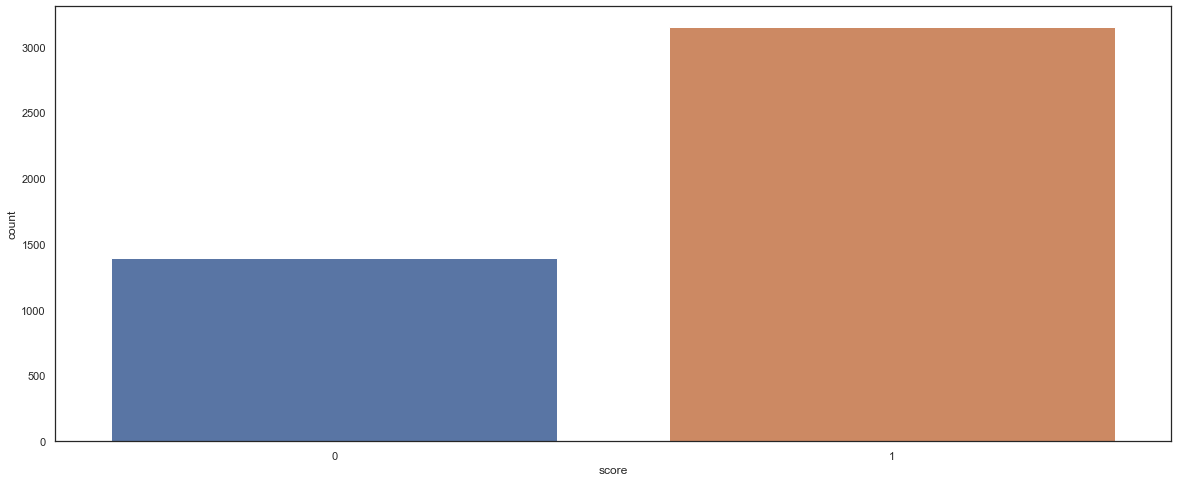

In [403]:
dist_plot = exploratory_analysis(train_df)
dist_plot.bar_plot()

In [404]:
train_X = sentiment_analysis.tf_idf_vect('word', 3, 3, 0.9, 1, None, stop_words=None, 
                                         data_train=train_x, fit=True)
test_X  = sentiment_analysis.tf_idf_vect('word', 3, 3, 0.9, 1, None, stop_words=None,  
                                         data=test_x, data_train=train_x, fit=False)

In [405]:
acc_xgb, f1_xgb, pre_xgb = sentiment_analysis.xg_boost(train_X, train_y, test_X, test_y)
acc_nbc, f1_nbc, pre_nbc = sentiment_analysis.naive_bayes(train_X, train_y, test_X, test_y)
acc_lrc, f1_lrc, pre_lrc = sentiment_analysis.logistic_classifier(train_X, train_y, test_X, test_y)

In [406]:
train_X = sentiment_analysis.tf_idf_vect('word', 2, 2, 0.9, 1, None, data_train=train_x, fit=True, 
                                         stop_words='english')
test_X  = sentiment_analysis.tf_idf_vect('word', 2, 2, 0.9, 1, None, data=test_x, data_train=train_x, fit=False, 
                                         stop_words='english')

acc_xgb_bi, f1_xgb_bi, pre_xg_bi = sentiment_analysis.xg_boost(train_X, train_y, test_X, test_y)
acc_nbc_bi, f1_nbc_bi, pre_nbc_bi = sentiment_analysis.naive_bayes(train_X, train_y, test_X, test_y)
acc_lrc_bi, f1_lrc_bi, pre_lrc_bi = sentiment_analysis.logistic_classifier(train_X, train_y, test_X, test_y)

In [186]:
# train_X = sentiment_analysis.count_vect('word', 3, 3, 0.9, 1, None, 
#                                         data_train=train_x, fit=True, stop_words='english')
# test_X  = sentiment_analysis.count_vect('word', 3, 3, 0.9, 1, None, 
#                                         data=test_x, data_train=train_x, fit=False, stop_words='english')

# acc_xgb_cnt, f1_xgb_cnt, pre_xgb_cnt = sentiment_analysis.xg_boost(train_X, train_y, test_X, test_y)
# acc_nbc_cnt, f1_nbc_cnt, pre_nbc_cnt = sentiment_analysis.naive_bayes(train_X, train_y, test_X, test_y)
# acc_lrc_cnt, f1_lrc_cnt, pre_lrc_cnt = sentiment_analysis.logistic_classifier(train_X, train_y, test_X, test_y)

In [151]:
# train_X = sentiment_analysis.count_vect('word', 2, 2, 0.9, 1, None,
#                                         data_train=train_x, fit=True, stop_words='english')
# test_X  = sentiment_analysis.count_vect('word', 2, 2, 0.9, 1, None, 
#                                         data=test_x, data_train=train_x, fit=False, stop_words='english')

In [152]:
# acc_xgb_cnt_bi, f1_xgb_cnt_bi, pre_xgb_cnt_bi = sentiment_analysis.xg_boost(train_X, train_y, test_X, test_y)
# acc_nbc_cnt_bi, f1_nbc_cnt_bi, pre_nbc_cnt_bi = sentiment_analysis.naive_bayes(train_X, train_y, test_X, test_y)
# acc_lrc_cnt_bi, f1_lrc_cnt_bi, pre_lrc_cnt_bi = sentiment_analysis.logistic_classifier(train_X, train_y, test_X, test_y)

In [412]:
columns = ["Accuracy", "F1-Score"]

rows = ["XGB-Trigram", 
        "NBC-Trigram", 
        "LRC-Trigram",
        "XGB-Bigram", 
        "NBC-Bigram", 
        "LRC-Bigram"]

acc_data = pd.DataFrame({'Accuracy': [acc_xgb, acc_nbc, acc_lrc, acc_xgb_bi, acc_nbc_bi, 
                                      acc_lrc_bi ]}, index = rows)
f1_data = pd.DataFrame({'F1-Score': [f1_xgb, f1_nbc ,f1_lrc, f1_xgb_bi,f1_nbc_bi, f1_lrc_bi
                                     ]}, index = rows)
pre_data = pd.DataFrame({'Precision': [pre_xgb, pre_nbc, pre_lrc, pre_xg_bi, pre_nbc_bi, pre_lrc_bi]}, index = rows)

performance_df = pd.concat([acc_data, f1_data], axis=1)
performance_df

,Accuracy,F1-Score
XGB-Trigram,0.705171,0.489283
NBC-Trigram,0.695270,0.454362
LRC-Trigram,0.693069,0.444587
XGB-Bigram,0.741474,0.639179
NBC-Bigram,0.735974,0.579050
LRC-Bigram,0.749175,0.631952


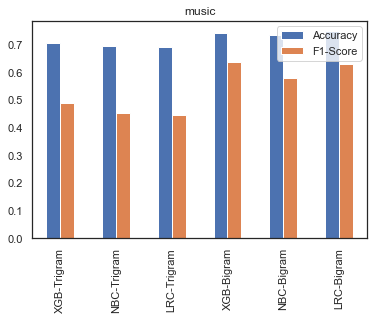

In [413]:
ax = performance_df.plot.bar(rot=90, title = "music")

In [411]:
performance_df.to_csv('music.csv')